In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from daq_driver import playrec
# from qcodes.instrument_drivers.stanford_research import SR860
import pyvisa
# lockin = SR860('lockin',"USB0::0xB506::0x2000::002765::INSTR")

In [12]:
def ttl():
        ttl = 2.5*(1-np.arange(512)%2).reshape(-1,1)
        _ = playrec(data=ttl,
                samplerate=5120,
                input_mapping=['Dev2/ai0'],
                output_mapping=['Dev2/ao3'])


In [3]:
rm = pyvisa.ResourceManager()
lockin = rm.open_resource('USB0::0xB506::0x2000::002765::INSTR')

lockin.write('*rst')
lockin.query('*idn?')
lockin.write('capturelen 256')
lockin.write('capturecfg xy')
lockin.write('rtrg posttl')


13

In [4]:
lockin.query('oflt?')

'10\n'

In [25]:
lockin.write('oflt 10')

9

In [26]:
lockin.query('captureratemax?')

'2441.40625\n'

In [27]:
lockin.write('capturestart one, samp')
print(lockin.query('capturestat?'))
ttl()
lockin.write('capturestop')
print(lockin.query('capturestat?'))

3

2



In [28]:
print(lockin.query('capturestat?'))

2



In [29]:
buffer_len = int(lockin.query('captureprog?')[:-1])

In [30]:
data = np.array(lockin.query_binary_values(f'captureget? 0, {buffer_len}')).reshape(-1,2)

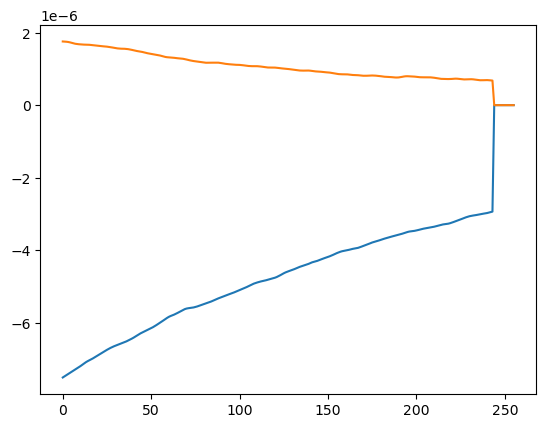

In [31]:
plt.plot(data[:256,:])